<a href="https://colab.research.google.com/github/Dila1998/Super-market-next-hour-sales-prediction-model-BSc-machine-learning-module-coursework-/blob/main/super_market_next_hour_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
# Processing Data sources
item_info_df = pd.read_csv('item_info.csv')
transactions_info_df = pd.read_csv('transactions_info.csv')

# item_info.csv

In [ ]:
item_info_df

,item_code,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,379231.0,Powders,Chilies,Spices,Seasoning & Coconut Cream,Grocery
1,1107457.0,Packets,Dehydrated Fruits,Dried Fruit,Processed/Preserved Fruits,Grocery
2,363130.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
3,526192.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
4,1112425.0,Small Packs,Savory Biscuit Packs,Savory Biscuits Regular,Biscuits,Grocery
...,...,...,...,...,...,...
53928,49849.0,Hand wash,Washing Detergents Powders,Washing Detergents,Laundry Care,Household
53929,229021.0,Wipes,Cleaning Accessories,Accessories,Baby Needs,Household
53930,925441.0,Party Banners,Party Banners,Party Accessories,Party Ware,Household
53931,879649.0,White,Sparkling Champaigne,Sparkling Wine,Wines,Liquor/Tobacco


In [ ]:
item_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53933 entries, 0 to 53932
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_code            53684 non-null  float64
 1   item_sub_segment     53933 non-null  object 
 2   item_segment         53933 non-null  object 
 3   item_category        53933 non-null  object 
 4   item_sub_department  53933 non-null  object 
 5   item_department      53933 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.5+ MB


In [ ]:
item_info_df.describe()

,item_code
count,5.368400e+04
mean,5.992792e+05
std,6.069427e+05
min,3.400000e+01
25%,1.309548e+05
50%,6.013150e+05
75%,9.828452e+05
max,8.991880e+06


In [ ]:
print(item_info_df.head())

   item_code item_sub_segment          item_segment            item_category  \
0   379231.0          Powders               Chilies                   Spices   
1  1107457.0          Packets     Dehydrated Fruits              Dried Fruit   
2   363130.0            Mixes           Paste Mixes                   Pastes   
3   526192.0            Mixes           Paste Mixes                   Pastes   
4  1112425.0      Small Packs  Savory Biscuit Packs  Savory Biscuits Regular   

          item_sub_department item_department  
0   Seasoning & Coconut Cream         Grocery  
1  Processed/Preserved Fruits         Grocery  
2   Seasoning & Coconut Cream         Grocery  
3   Seasoning & Coconut Cream         Grocery  
4                    Biscuits         Grocery  


In [ ]:
# Summary statistics for numerical column (item_code)
print(item_info_df['item_code'].describe())

# Value counts for categorical columns
print(item_info_df['item_sub_segment'].value_counts())
print(item_info_df['item_segment'].value_counts())
print(item_info_df['item_category'].value_counts())
print(item_info_df['item_sub_department'].value_counts())
print(item_info_df['item_department'].value_counts())

count    5.368400e+04
mean     5.992792e+05
std      6.069427e+05
min      3.400000e+01
25%      1.309548e+05
50%      6.013150e+05
75%      9.828452e+05
max      8.991880e+06
Name: item_code, dtype: float64
Imported                2522
Local                   1901
Unclassified            1779
Packets                 1245
Crockery                1129
                        ... 
Roll Cages                 1
Walnut                     1
Boys Sets                  1
Other Meat Chinese R       1
Sports Bags                1
Name: item_sub_segment, Length: 1301, dtype: int64
Unclassified          1779
Crockery              1129
Tablets               1051
Boys                   960
Books                  878
                      ... 
Aerosol Inscetides       1
Girls Vest Print         1
Cake Wrapping            1
Lip Care                 1
Sports Bags              1
Name: item_segment, Length: 1357, dtype: int64
Kitchenware                          2878
Toy                                 

In [ ]:
# Missing Value Analysis
missing_values = item_info_df.isnull().sum()
missing_values

item_code              249
item_sub_segment         0
item_segment             0
item_category            0
item_sub_department      0
item_department          0
dtype: int64

In [ ]:
item_info_df[item_info_df.item_code.isna()]

,item_code,item_sub_segment,item_segment,item_category,item_sub_department,item_department
615,NaN,Boys Crew Nk,Boys Crew Nk,Boys,Apparel,Lifestyle
649,NaN,Baby Accessories,Accessories,Baby Needs,Personal Care,Lifestyle
802,NaN,Executive Bags,Executive Bags,Luggage Bags,Luggage,Lifestyle
825,NaN,Pieces,Chilies,Spices,Seasoning & Coconut Cream,Grocery
1181,NaN,All Purpose Floor &,All Purpose Floor & Tile Cleaners,All Purpose Cleaners,Cleaning Consumables,Household
...,...,...,...,...,...,...
53404,NaN,Bottles,Chocolate Spreads,Ambient Spreads,Spreads,Grocery
53623,NaN,Ladies Dress,Casual,Ladies,Apparel,Lifestyle
53650,NaN,Bottles,Sunflower Oil,Liquid Cooking Oils & Fats,Oils/Fats,Grocery
53672,NaN,Mens Vest,Casual,Mens,Apparel,Lifestyle


In [ ]:
item_info_df = item_info_df.dropna()
item_info_df

,item_code,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,379231.0,Powders,Chilies,Spices,Seasoning & Coconut Cream,Grocery
1,1107457.0,Packets,Dehydrated Fruits,Dried Fruit,Processed/Preserved Fruits,Grocery
2,363130.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
3,526192.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
4,1112425.0,Small Packs,Savory Biscuit Packs,Savory Biscuits Regular,Biscuits,Grocery
...,...,...,...,...,...,...
53928,49849.0,Hand wash,Washing Detergents Powders,Washing Detergents,Laundry Care,Household
53929,229021.0,Wipes,Cleaning Accessories,Accessories,Baby Needs,Household
53930,925441.0,Party Banners,Party Banners,Party Accessories,Party Ware,Household
53931,879649.0,White,Sparkling Champaigne,Sparkling Wine,Wines,Liquor/Tobacco


In [ ]:
# Hierarchical Analysis
hierarchical_counts = item_info_df.groupby(['item_department', 'item_sub_department', 'item_category', 'item_segment', 'item_sub_segment']).size().reset_index(name='Counts')
hierarchical_counts.sort_values(by='Counts', ascending=False)

,item_department,item_sub_department,item_category,item_segment,item_sub_segment,Counts
1782,Lifestyle,Homeware 2,Kitchenware,Crockery,Crockery,1053
1797,Lifestyle,Homeware 2,Stationary/Books,Books,Books,844
1798,Lifestyle,Homeware 2,Toy,Boys,Boys,795
1802,Lifestyle,Homeware 2,Toy,Pick me up,Pick me up,586
2154,Pharmacy,Miscellaneous,Miscellaneous,Miscellaneous,Miscellaneous,582
...,...,...,...,...,...,...
1432,Household,General Needs,Shoe Care,Shoe Care Deodorant,Shoe Care Deodorant,1
589,Grocery,Desserts,Dessert Ingredients,Citric Acid,Citric Acid,1
1920,Liquor/Tobacco,Wines,Still Wine,Other,Rose,1
1917,Liquor/Tobacco,Wines,Still Wine,Italian,Rose,1


In [ ]:
category_columns = ['item_sub_segment', 'item_segment', 'item_category', 'item_sub_department', 'item_department']
top_values = {}
for col in category_columns:
    top_values[col] = item_info_df[col].value_counts().head(5)
top_values

{'item_sub_segment': Imported        2510
 Local           1899
 Unclassified    1774
 Packets         1244
 Crockery        1129
 Name: item_sub_segment, dtype: int64,
 'item_segment': Unclassified    1774
 Crockery        1129
 Tablets         1051
 Boys             959
 Books            878
 Name: item_segment, dtype: int64,
 'item_category': Kitchenware     2877
 Toy             2299
 Unclassified    1447
 living          1039
 Accessories      919
 Name: item_category, dtype: int64,
 'item_sub_department': Homeware 2       8134
 Confectionery    1775
 Desserts         1630
 Hair Care        1452
 Baby Needs       1384
 Name: item_sub_department, dtype: int64,
 'item_department': Household    13504
 Grocery      12344
 Lifestyle     8228
 Homeware      5677
 Beverages     3062
 Name: item_department, dtype: int64}

In [ ]:
numeric_columns = item_info_df.select_dtypes(include=['float64', 'int64']).columns
numeric_summary = item_info_df[numeric_columns].describe()
numeric_summary

,item_code
count,5.368400e+04
mean,5.992792e+05
std,6.069427e+05
min,3.400000e+01
25%,1.309548e+05
50%,6.013150e+05
75%,9.828452e+05
max,8.991880e+06


In [ ]:
print(item_info_df['item_department'].unique())

['Grocery' 'Household' 'Pharmacy' 'Liquor/Tobacco' 'Homeware' 'Bakery'
 'Chilled' 'Beverages' 'Miscellaneous' 'Frozen Food' 'Lifestyle']


# transactions_info.csv

In [ ]:
transactions_info_df

,item_code,invoice_num,invoice_time,item_qty
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.000
1,505825,4989509,2022-03-11T09:36:54.000Z,1.000
2,505825,2124807,2022-03-11T09:11:50.000Z,1.000
3,898,2124807,2022-03-11T09:11:53.000Z,1.000
4,129022,2125158,2022-03-11T22:36:00.000Z,1.000
...,...,...,...,...
352346,1095469,3151809,2022-02-12T16:51:25.000Z,1.000
352347,1014424,3151809,2022-02-12T16:52:51.000Z,1.000
352348,1075651,3151809,2022-02-12T16:52:05.000Z,1.000
352349,861946,3151809,2022-02-12T16:51:29.000Z,1.000


In [ ]:
print(transactions_info_df.head())

   item_code invoice_num              invoice_time  item_qty
0    1080988     4989509  2022-03-11T09:37:02.000Z       1.0
1     505825     4989509  2022-03-11T09:36:54.000Z       1.0
2     505825     2124807  2022-03-11T09:11:50.000Z       1.0
3        898     2124807  2022-03-11T09:11:53.000Z       1.0
4     129022     2125158  2022-03-11T22:36:00.000Z       1.0


In [ ]:
transactions_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352351 entries, 0 to 352350
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_code     352351 non-null  int64  
 1   invoice_num   352351 non-null  object 
 2   invoice_time  352351 non-null  object 
 3   item_qty      352351 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.8+ MB


In [ ]:
transactions_info_df.describe()

,item_code,item_qty
count,3.523510e+05,352351.000000
mean,6.241634e+05,1.572737
std,4.444372e+05,2.702548
min,8.800000e+01,0.022000
25%,1.266550e+05,1.000000
50%,8.532790e+05,1.000000
75%,1.055617e+06,1.046000
max,2.000023e+06,400.000000


In [ ]:
missing_values = transactions_info_df.isnull().sum()
missing_values

item_code       0
invoice_num     0
invoice_time    0
item_qty        0
dtype: int64

### remove invoice_num

In [ ]:
# Drop the 'invoice_num' column
transactions_info_df =transactions_info_df.drop(columns=['invoice_num'])

## set date and time (hour)

In [ ]:
# Convert 'invoice_time' to datetime with the correct format
transactions_info_df['invoice_time'] = pd.to_datetime(transactions_info_df['invoice_time'], format='%Y-%m-%d %H:%M:%S')

# Extract 'invoice_date' from 'invoice_time' and keep it as a date
transactions_info_df['invoice_date'] = transactions_info_df['invoice_time'].dt.date

# Extract only the hour from 'invoice_time' and convert it to a string
transactions_info_df['invoice_time'] = transactions_info_df['invoice_time'].dt.strftime('%H')
# Rearrange the columns
transactions_info_df = transactions_info_df[['item_code', 'invoice_date', 'invoice_time', 'item_qty']]
transactions_info_df.dtypes

item_code         int64
invoice_date     object
invoice_time     object
item_qty        float64
dtype: object

In [ ]:
#to find open time and close time
max_invoice_time = transactions_info_df['invoice_time'].max()
min_invoice_time = transactions_info_df['invoice_time'].min()

# Print the results
print(f"Maximum invoice time: {max_invoice_time}")
print(f"Minimum invoice time: {min_invoice_time}")

Maximum invoice time: 23
Minimum invoice time: 00


In [ ]:
print(transactions_info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352351 entries, 0 to 352350
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_code     352351 non-null  int64  
 1   invoice_date  352351 non-null  object 
 2   invoice_time  352351 non-null  object 
 3   item_qty      352351 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.8+ MB
None


In [ ]:
transactions_info_df

,item_code,invoice_date,invoice_time,item_qty
0,1080988,2022-03-11,09,1.000
1,505825,2022-03-11,09,1.000
2,505825,2022-03-11,09,1.000
3,898,2022-03-11,09,1.000
4,129022,2022-03-11,22,1.000
...,...,...,...,...
352346,1095469,2022-02-12,16,1.000
352347,1014424,2022-02-12,16,1.000
352348,1075651,2022-02-12,16,1.000
352349,861946,2022-02-12,16,1.000


### merge data sets

In [ ]:
# Merge the two DataFrames based on the 'item_code' column
merged_df = transactions_info_df.merge(item_info_df, on='item_code', how='inner')
merged_df

,item_code,invoice_num,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
1,1080988,2125081,2022-03-11T18:56:29.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
2,1080988,9370252,2022-03-11T18:21:58.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
3,1080988,Z003000,2022-03-11T13:41:34.000Z,4.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
4,1080988,5830278,2022-03-11T19:11:50.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
...,...,...,...,...,...,...,...,...,...
352746,1042333,4986151,2022-02-27T19:26:19.000Z,1.0,Men's Facial Need Ba,Men's Facial Cleansers,Men's Facial Care,Men's Toiletries,Household
352747,1018465,5826895,2022-02-27T14:23:22.000Z,1.0,Accessories,Accessories,Accessories,Kitchenware,Homeware
352748,1098367,3155998,2022-02-27T18:58:19.000Z,1.0,Tetra,Multiple Consumption RTD Juices,Multiple Consumption RTD Beverages,Juices & Carbonates,Beverages
352749,970360,5826871,2022-02-27T12:36:19.000Z,1.0,Costumes/Dress Ups,Costumes/Dress Ups,Party Accessories,Party Ware,Household


### exclude items

In [ ]:
#merged DataFrame
merged_df = merged_df[(merged_df['item_department'] != 'Liquor/Tobacco') & (merged_df['item_department'] != 'Miscellaneous')]

In [ ]:
# Group the data by 'item_department' and count unique 'item_code' values
unique_item_codes_by_department = merged_df.groupby('item_department')['item_code'].nunique()

# Print or display the result
print(unique_item_codes_by_department)

item_department
Beverages       661
Chilled         295
Frozen Food     307
Grocery        2100
Homeware        458
Household      2153
Pharmacy        107
Name: item_code, dtype: int64


### get top 25 items

In [ ]:
# Group by 'item_department' and 'item_code', then calculate the sum of 'item_qty'
department_item_qty = merged_df.groupby(['item_department', 'item_code'])['item_qty'].sum().reset_index()

# Sort the DataFrame by the sum of 'item_qty' in descending order
department_item_qty = department_item_qty.sort_values(by='item_qty', ascending=False)

# Now, 'department_item_qty' contains the sum of 'item_qty' for each 'item_code' within each 'item_department' in descending order
department_item_qty

,item_department,item_code,item_qty
2808,Grocery,1084192,9405.000
1707,Grocery,193030,8225.373
25,Beverages,17296,5988.000
707,Chilled,169504,5416.000
138,Beverages,123307,4863.000
...,...,...,...
841,Chilled,1077433,0.376
843,Chilled,1077451,0.306
840,Chilled,1077424,0.172
3192,Grocery,1102003,0.160


In [ ]:
# Group by 'item_department' and select the top 25 'item_code' based on 'item_qty'
top_25_items = department_item_qty.groupby('item_department').apply(lambda x: x.nlargest(25, 'item_qty')).reset_index(drop=True)
top_25_items

,item_department,item_code,item_qty
0,Beverages,17296,5988.0
1,Beverages,123307,4863.0
2,Beverages,1003894,4369.0
3,Beverages,898,3549.0
4,Beverages,1062358,2722.0
...,...,...,...
170,Pharmacy,1075633,64.0
171,Pharmacy,208960,63.0
172,Pharmacy,989980,63.0
173,Pharmacy,1029445,63.0


In [ ]:
# Get a list of the top 25 item codes
top_25_item_codes = top_25_items['item_code'].tolist()

# Filter 'merged_df' to include only rows where 'item_code' is in the top 25 list
train_data_df = merged_df[merged_df['item_code'].isin(top_25_item_codes)]

#'filtered_merged_df' contains rows from 'merged_df' with 'item_code' in the top 25 list

In [ ]:
print(train_data_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79406 entries, 645 to 349948
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_code            79406 non-null  int64  
 1   invoice_date         79406 non-null  object 
 2   invoice_time         79406 non-null  object 
 3   item_qty             79406 non-null  float64
 4   item_sub_segment     79406 non-null  object 
 5   item_segment         79406 non-null  object 
 6   item_category        79406 non-null  object 
 7   item_sub_department  79406 non-null  object 
 8   item_department      79406 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.1+ MB
None


In [ ]:
train_data_df

,item_code,invoice_date,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
645,505825,2022-03-11,09,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
646,505825,2022-03-11,09,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
647,505825,2022-03-11,10,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
648,505825,2022-03-11,09,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
649,505825,2022-03-11,10,1.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages
...,...,...,...,...,...,...,...,...,...
349944,208960,2022-01-13,14,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy
349945,208960,2022-01-13,12,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy
349946,208960,2022-01-13,11,1.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy
349947,208960,2022-01-17,22,2.0,Lozenges,Lozenges,Cough Medicines,"Cough, Cold & Flu Relief",Pharmacy


## hourly sales

In [ ]:
# Group by 'invoice_date', 'invoice_time', 'item_code', and calculate the sum of 'item_qty'
train_data_df = train_data_df.groupby(['invoice_date', 'invoice_time', 'item_code'])['item_qty'].sum().reset_index()

# Reorder the columns as 'invoice_date', 'invoice_time', 'item_code', 'item_qty'
train_data_df = train_data_df[['invoice_date', 'invoice_time', 'item_code', 'item_qty']]

In [ ]:
# Sort 'train_data_df' in ascending order based on the specified columns
train_data_df = train_data_df.sort_values(by=['item_code', 'invoice_time', 'invoice_date'], ascending=True)

train_data_df

,invoice_date,invoice_time,item_code,item_qty
7746,2022-01-18,00,898,1.0
8383,2022-01-19,00,898,6.0
10198,2022-01-22,00,898,1.0
32326,2022-02-27,00,898,3.0
35598,2022-03-04,00,898,3.0
...,...,...,...,...
19977,2022-02-06,22,1107943,4.0
32325,2022-02-26,22,1107943,1.0
34290,2022-03-01,22,1107943,1.0
36302,2022-03-04,22,1107943,3.0


### add missing date&hour rows

In [ ]:
# Convert 'invoice_date' to datetime
train_data_df['invoice_date'] = pd.to_datetime(train_data_df['invoice_date'])

# Create a MultiIndex with all possible combinations of 'invoice_date', 'item_code', and 'invoice_time'
all_dates = pd.date_range(start=train_data_df['invoice_date'].min(), end=train_data_df['invoice_date'].max())
all_times = [str(i).zfill(2) for i in range(0, 24)]
all_item_codes = train_data_df['item_code'].unique()

multi_index = pd.MultiIndex.from_product([all_dates, all_item_codes, all_times], names=['invoice_date', 'item_code', 'invoice_time'])

In [ ]:
# Reindex the DataFrame with the MultiIndex and fill missing values with 0
train_data_df = train_data_df.set_index(['invoice_date', 'item_code', 'invoice_time']).reindex(multi_index, fill_value=0).reset_index()

In [ ]:
# Sort 'train_data_df' in ascending order based on the specified columns
train_data_df = train_data_df.sort_values(by=['item_code', 'invoice_time', 'invoice_date'], ascending=True)
train_data_df = train_data_df.reset_index(drop=True)

In [ ]:
train_data_df

,invoice_date,item_code,invoice_time,item_qty
0,2022-01-05,898,00,0.0
1,2022-01-06,898,00,0.0
2,2022-01-07,898,00,0.0
3,2022-01-08,898,00,0.0
4,2022-01-09,898,00,0.0
...,...,...,...,...
306595,2022-03-14,1107943,23,0.0
306596,2022-03-15,1107943,23,0.0
306597,2022-03-16,1107943,23,0.0
306598,2022-03-17,1107943,23,0.0


### get next hour sales

In [ ]:
# Sort 'train_data_df' in ascending order based on the specified columns
train_data_df = train_data_df.sort_values(by=['item_code', 'invoice_date', 'invoice_time'], ascending=True)
train_data_df = train_data_df.reset_index(drop=True)

In [ ]:
train_data_df['nxt_hr_qty_(Y)'] = train_data_df['item_qty'].copy()

In [ ]:
train_data_df

,invoice_date,item_code,invoice_time,item_qty,nxt_hr_qty_(Y)
0,2022-01-05,898,00,0.0,0.0
1,2022-01-05,898,01,0.0,0.0
2,2022-01-05,898,02,0.0,0.0
3,2022-01-05,898,03,0.0,0.0
4,2022-01-05,898,04,0.0,0.0
...,...,...,...,...,...
306595,2022-03-18,1107943,19,0.0,0.0
306596,2022-03-18,1107943,20,0.0,0.0
306597,2022-03-18,1107943,21,0.0,0.0
306598,2022-03-18,1107943,22,0.0,0.0


In [ ]:
# Increase the index of 'nxt_hr_qty_(Y)' column by one
train_data_df['nxt_hr_qty_(Y)'] = train_data_df.groupby('item_code')['nxt_hr_qty_(Y)'].shift(-1)

train_data_df['nxt_hr_qty_(Y)'].fillna(0, inplace=True)

train_data_df = train_data_df[['nxt_hr_qty_(Y)', 'invoice_date', 'invoice_time', 'item_code', 'item_qty']]

train_data_df

In [ ]:
item_code_info_df = pd.read_csv('item_info.csv')

item_code_info_df

,item_code,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,379231.0,Powders,Chilies,Spices,Seasoning & Coconut Cream,Grocery
1,1107457.0,Packets,Dehydrated Fruits,Dried Fruit,Processed/Preserved Fruits,Grocery
2,363130.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
3,526192.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
4,1112425.0,Small Packs,Savory Biscuit Packs,Savory Biscuits Regular,Biscuits,Grocery
...,...,...,...,...,...,...
53928,49849.0,Hand wash,Washing Detergents Powders,Washing Detergents,Laundry Care,Household
53929,229021.0,Wipes,Cleaning Accessories,Accessories,Baby Needs,Household
53930,925441.0,Party Banners,Party Banners,Party Accessories,Party Ware,Household
53931,879649.0,White,Sparkling Champaigne,Sparkling Wine,Wines,Liquor/Tobacco


In [ ]:
Master_Table = train_data_df.merge(item_code_info_df, on='item_code', how='inner')
Master_Table
Master_Table.to_csv('descriptive_analysis.csv', index=False)

In [ ]:
Master_Table.info()
Master_Table.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308352 entries, 0 to 308351
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   nxt_hr_qty_(Y)       308352 non-null  float64       
 1   invoice_date         308352 non-null  datetime64[ns]
 2   invoice_time         308352 non-null  object        
 3   item_code            308352 non-null  int64         
 4   item_qty             308352 non-null  float64       
 5   item_sub_segment     308352 non-null  object        
 6   item_segment         308352 non-null  object        
 7   item_category        308352 non-null  object        
 8   item_sub_department  308352 non-null  object        
 9   item_department      308352 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 25.9+ MB


,nxt_hr_qty_(Y),item_code,item_qty
count,308352.000000,3.083520e+05,308352.000000
mean,0.560979,6.350727e+05,0.560979
std,3.151374,4.422159e+05,3.151374
min,0.000000,8.980000e+02,0.000000
25%,0.000000,1.274538e+05,0.000000
50%,0.000000,8.997910e+05,0.000000
75%,0.000000,1.047321e+06,0.000000
max,403.000000,1.107943e+06,403.000000


# Features

## 	Sales related features

In [ ]:
# 1. Historical Sales Features
# Total sales for the same item in the past hour
Master_Table['item_sales_last_hour'] = Master_Table.groupby('item_code')['item_qty'].shift(1)


In [ ]:
# Total sales for the same item in the past N hours (e.g., 24 hours)
N_hours = 24
Master_Table['item_sales_last_N_hours'] = Master_Table.groupby('item_code')['item_qty'].rolling(N_hours).sum().reset_index(0, drop=True)

In [ ]:
# Average sales for the same item in the past N hours
N_hours = 12
Master_Table['item_avg_sales_last_N_hours'] = Master_Table.groupby('item_code')['item_qty'].rolling(N_hours).mean().reset_index(0, drop=True)


In [ ]:
# 2. Item Category and Department Features
# Total sales for the item's category in the past N hours
N_hours = 6
Master_Table['category_sales_last_N_hours'] = Master_Table.groupby('item_category')['item_qty'].rolling(N_hours).sum().reset_index(0, drop=True)


In [ ]:
# Total sales for the item's department in the past N hours
N_hours = 3
Master_Table['department_sales_last_N_hours'] = Master_Table.groupby('item_department')['item_qty'].rolling(N_hours).sum().reset_index(0, drop=True)


######## 5. Moving Averages
Master_Table['3_hour_moving_average'] = Master_Table.groupby('item_code')['item_qty'].rolling(3).mean().reset_index(0, drop=True)
Master_Table['6_hour_moving_average'] = Master_Table.groupby('item_code')['item_qty'].rolling(6).mean().reset_index(0, drop=True)
Master_Table['12_hour_moving_average'] = Master_Table.groupby('item_code')['item_qty'].rolling(12).mean().reset_index(0, drop=True)


In [ ]:
# 7. Lag Features
#Master_Table['item_sales_last_3_hours'] = Master_Table.groupby('item_code')['item_qty'].shift(3)
Master_Table['item_sales_last_6_hours'] = Master_Table.groupby('item_code')['item_qty'].shift(6)
#Master_Table['item_sales_last_12_hours'] = Master_Table.groupby('item_code')['item_qty'].shift(12)

In [ ]:
# Feature 10: Create moving averages (e.g., 3-hour and 12-hour moving averages)
#Master_Table['1_hour_moving_average'] = Master_Table.groupby('item_code')['nxt_hr_qty_(Y)'].rolling(1).mean().reset_index(0, drop=True)
#Master_Table['3_hour_moving_average'] = Master_Table.groupby('item_code')['nxt_hr_qty_(Y)'].rolling(3).mean().reset_index(0, drop=True)
Master_Table['6_hour_moving_average'] = Master_Table.groupby('item_code')['nxt_hr_qty_(Y)'].rolling(6).mean().reset_index(0, drop=True)
#Master_Table['12_hour_moving_average'] = Master_Table.groupby('item_code')['nxt_hr_qty_(Y)'].rolling(12).mean().reset_index(0, drop=True)

### item related sales

In [ ]:
#Total Sales per Item
Master_Table['total_sales_per_item'] = Master_Table.groupby('item_code')['item_qty'].transform('sum')


In [ ]:
#Average Sales per Item
Master_Table['average_sales_per_item'] = Master_Table.groupby('item_code')['item_qty'].transform('mean')


In [ ]:
#std Sales per Item
Master_Table['std_sales_per_item'] = Master_Table.groupby('item_code')['item_qty'].transform('std')


### Hour related sales

In [ ]:
#total Sales per Hour
#merged_df['total_sales_per_hour'] = merged_df.groupby(['invoice_date', 'invoice_time', 'item_code'])['item_qty'].transform('sum')
Master_Table['total_sales_per_hour'] = Master_Table.groupby(['invoice_time', 'item_code'])['item_qty'].transform('sum')

#Average Sales per Hour
Master_Table['avg_sales_per_hour'] = Master_Table.groupby(['invoice_time', 'item_code'])['item_qty'].transform('mean')

#Average Sales per Hour
Master_Table['std_sales_per_hour'] = Master_Table.groupby(['invoice_time', 'item_code'])['item_qty'].transform('std')

#Sales Change from Previous Hour
Master_Table['sales_change_from_previous_hour'] = Master_Table.groupby('item_code')['item_qty'].diff()

### date related sales

In [ ]:
#merged_df['total_sales_per_hour'] = merged_df.groupby(['invoice_date', 'invoice_time', 'item_code'])['item_qty'].transform('sum')
Master_Table['total_sales_per_hour_dayly'] = Master_Table.groupby(['invoice_date', 'invoice_time', 'item_code'])['item_qty'].transform('sum')

#merged_df['total_sales_per_hour'] = merged_df.groupby(['invoice_date', 'invoice_time', 'item_code'])['item_qty'].transform('sum')
Master_Table['mean_sales_per_hour_dayly'] = Master_Table.groupby(['invoice_date', 'invoice_time', 'item_code'])['item_qty'].transform('mean')


In [ ]:
#total Sales per day
Master_Table['total_sales_per_day'] = Master_Table.groupby(['invoice_date', 'item_code'])['item_qty'].transform('sum')

#Average Sales per day
Master_Table['avg_sales_per_day'] = Master_Table.groupby(['invoice_date', 'item_code'])['item_qty'].transform('mean')

#median Sales per day
Master_Table['median_per_day'] = Master_Table.groupby(['invoice_date', 'item_code'])['item_qty'].transform('median')

#Average Sales per day
Master_Table['std_sales_per_day'] = Master_Table.groupby(['invoice_date', 'item_code'])['item_qty'].transform('std')

In [ ]:
#weekly sales
# Extract the week number from the 'invoice_date'
Master_Table['week_number'] = Master_Table['invoice_date'].dt.strftime('%U')
# Calculate weekly sales as the sum of 'item_qty' for each week
Master_Table['weekly_sales'] = Master_Table.groupby(['week_number', 'item_code'])['item_qty'].transform('sum')

## 	Item related features

In [ ]:
#Number of Unique Items per Invoice
Master_Table['unique_items_per_invoice'] = Master_Table.groupby(['invoice_date', 'invoice_time'])['item_code'].transform('nunique')

## Time related features

In [ ]:
Master_Table['invoice_year'] = Master_Table['invoice_date'].dt.year

Master_Table['invoice_month'] = Master_Table['invoice_date'].dt.month

Master_Table['invoice_day'] = Master_Table['invoice_date'].dt.day

Master_Table['invoice_hour'] = pd.to_datetime(Master_Table['invoice_time'], format='%H').dt.hour


In [ ]:
# Extract the week number from the 'invoice_date'
Master_Table['week_number'] = Master_Table['invoice_date'].dt.strftime('%U')

In [ ]:
# Calculate the day of the week (0 = Monday, 6 = Sunday) and create a 'day_of_week' column
Master_Table['day_of_week'] = Master_Table['invoice_date'].dt.dayofweek


In [ ]:
# Calculate whether each date is a weekday (1) or a weekend day (0) and create a 'weekday' column
Master_Table['weekday'] = (Master_Table['invoice_date'].dt.dayofweek < 5).astype(int)


In [ ]:
Master_Table

,nxt_hr_qty_(Y),invoice_date,invoice_time,item_code,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,...,std_sales_per_day,week_number,weekly_sales,unique_items_per_invoice,invoice_year,invoice_month,invoice_day,invoice_hour,day_of_week,weekday
0,0.0,2022-01-05,00,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,0,2,1
1,0.0,2022-01-05,01,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,1,2,1
2,0.0,2022-01-05,02,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,2,2,1
3,0.0,2022-01-05,03,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,3,2,1
4,0.0,2022-01-05,04,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308347,0.0,2022-03-18,19,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,19,4,1
308348,0.0,2022-03-18,20,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,20,4,1
308349,0.0,2022-03-18,21,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,21,4,1
308350,0.0,2022-03-18,22,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,22,4,1


In [ ]:
desired_column = Master_Table['total_sales_per_hour_dayly']
print(desired_column)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
308347    0.0
308348    0.0
308349    0.0
308350    0.0
308351    0.0
Name: total_sales_per_hour_dayly, Length: 308352, dtype: float64


In [ ]:
Master_Table.corr()['nxt_hr_qty_(Y)']

C:\Users\Dilanka\AppData\Local\Temp\ipykernel_884\2616058856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Master_Table.corr()['nxt_hr_qty_(Y)']


nxt_hr_qty_(Y)                     1.000000
item_code                         -0.043964
item_qty                           0.205895
item_sales_last_hour               0.154977
item_sales_last_N_hours            0.221855
item_avg_sales_last_N_hours        0.172567
category_sales_last_N_hours        0.224185
department_sales_last_N_hours      0.238228
item_sales_last_6_hours            0.051317
6_hour_moving_average              0.510797
total_sales_per_item               0.233655
average_sales_per_item             0.234625
std_sales_per_item                 0.192397
total_sales_per_hour               0.308788
avg_sales_per_hour                 0.309692
std_sales_per_hour                 0.222136
sales_change_from_previous_hour    0.040474
total_sales_per_hour_dayly         0.204228
mean_sales_per_hour_dayly          0.205895
total_sales_per_day                0.337449
avg_sales_per_day                  0.338596
median_per_day                     0.176149
std_sales_per_day               

In [ ]:
Master_Table

,nxt_hr_qty_(Y),invoice_date,invoice_time,item_code,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,...,std_sales_per_day,week_number,weekly_sales,unique_items_per_invoice,invoice_year,invoice_month,invoice_day,invoice_hour,day_of_week,weekday
0,0.0,2022-01-05,00,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,0,2,1
1,0.0,2022-01-05,01,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,1,2,1
2,0.0,2022-01-05,02,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,2,2,1
3,0.0,2022-01-05,03,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,3,2,1
4,0.0,2022-01-05,04,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.000000,01,0.0,175,2022,1,5,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308347,0.0,2022-03-18,19,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,19,4,1
308348,0.0,2022-03-18,20,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,20,4,1
308349,0.0,2022-03-18,21,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,21,4,1
308350,0.0,2022-03-18,22,1107943,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,...,0.204124,11,14.0,175,2022,3,18,22,4,1


In [ ]:
# Perform one-hot encoding for the 'item_department' column
#Master_Table = pd.get_dummies(Master_Table, columns=['item_department'], prefix='item_department')

In [ ]:
Master_Table.head()

,nxt_hr_qty_(Y),invoice_date,invoice_time,item_code,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,...,std_sales_per_day,week_number,weekly_sales,unique_items_per_invoice,invoice_year,invoice_month,invoice_day,invoice_hour,day_of_week,weekday
0,0.0,2022-01-05,00,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.0,01,0.0,175,2022,1,5,0,2,1
1,0.0,2022-01-05,01,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.0,01,0.0,175,2022,1,5,1,2,1
2,0.0,2022-01-05,02,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.0,01,0.0,175,2022,1,5,2,2,1
3,0.0,2022-01-05,03,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.0,01,0.0,175,2022,1,5,3,2,1
4,0.0,2022-01-05,04,898,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,...,0.0,01,0.0,175,2022,1,5,4,2,1


In [ ]:
import pandas as pd

# Assuming Master_Table is your DataFrame
duplicated_columns = Master_Table.columns[Master_Table.columns.duplicated()]
print("Duplicated Columns:")
print(duplicated_columns)


Duplicated Columns:
Index([], dtype='object')


In [ ]:
Master_Table.isnull().sum()


nxt_hr_qty_(Y)                        0
invoice_date                          0
invoice_time                          0
item_code                             0
item_qty                              0
item_sub_segment                      0
item_segment                          0
item_category                         0
item_sub_department                   0
item_department                       0
item_sales_last_hour                175
item_sales_last_N_hours            4025
item_avg_sales_last_N_hours        1925
category_sales_last_N_hours         320
department_sales_last_N_hours        14
item_sales_last_6_hours            1050
6_hour_moving_average               875
total_sales_per_item                  0
average_sales_per_item                0
std_sales_per_item                    0
total_sales_per_hour                  0
avg_sales_per_hour                    0
std_sales_per_hour                    0
sales_change_from_previous_hour     175
total_sales_per_hour_dayly            0


In [ ]:
Master_Table['sales_change_from_previous_hour'].fillna(Master_Table['sales_change_from_previous_hour'].mean(), inplace=True)
Master_Table['item_sales_last_hour'].fillna(Master_Table['item_sales_last_hour'].mean(), inplace=True)
Master_Table['item_sales_last_N_hours'].fillna(Master_Table['item_sales_last_N_hours'].mean(), inplace=True)
Master_Table['item_avg_sales_last_N_hours'].fillna(Master_Table['item_avg_sales_last_N_hours'].mean(), inplace=True)
Master_Table['category_sales_last_N_hours'].fillna(Master_Table['category_sales_last_N_hours'].mean(), inplace=True)
Master_Table['department_sales_last_N_hours'].fillna(Master_Table['department_sales_last_N_hours'].mean(), inplace=True)
#Master_Table['3_hour_moving_average'].fillna(Master_Table['3_hour_moving_average'].mean(), inplace=True)
#Master_Table['item_sales_last_3_hours'].fillna(Master_Table['item_sales_last_3_hours'].mean(), inplace=True)
Master_Table['item_sales_last_6_hours'].fillna(Master_Table['item_sales_last_6_hours'].mean(), inplace=True)
Master_Table['6_hour_moving_average'].fillna(Master_Table['6_hour_moving_average'].mean(), inplace=True)
#Master_Table['12_hour_moving_average'].fillna(Master_Table['12_hour_moving_average'].mean(), inplace=True)
#Master_Table['item_sales_last_12_hours'].fillna(Master_Table['item_sales_last_12_hours'].mean(), inplace=True)

In [ ]:
Master_Table.isnull().sum()

nxt_hr_qty_(Y)                     0
invoice_date                       0
invoice_time                       0
item_code                          0
item_qty                           0
item_sub_segment                   0
item_segment                       0
item_category                      0
item_sub_department                0
item_department                    0
item_sales_last_hour               0
item_sales_last_N_hours            0
item_avg_sales_last_N_hours        0
category_sales_last_N_hours        0
department_sales_last_N_hours      0
item_sales_last_6_hours            0
6_hour_moving_average              0
total_sales_per_item               0
average_sales_per_item             0
std_sales_per_item                 0
total_sales_per_hour               0
avg_sales_per_hour                 0
std_sales_per_hour                 0
sales_change_from_previous_hour    0
total_sales_per_hour_dayly         0
mean_sales_per_hour_dayly          0
total_sales_per_day                0
a

# primary key & target variable

In [ ]:
# Ensure the primary keys are not part of the feature set
primary_keys = ['item_code', 'invoice_date', 'invoice_time']

# Define your target variable
target = 'nxt_hr_qty_(Y)'

# Exclude the target variable from the list of features
features = [col for col in Master_Table.columns if col not in primary_keys and col != target]

In [ ]:
# Create your feature matrix X and target variable y
X = Master_Table[features]
y = Master_Table[target]

In [ ]:
column_names = X.columns
print(column_names)

Index(['item_qty', 'item_sub_segment', 'item_segment', 'item_category',
       'item_sub_department', 'item_department', 'item_sales_last_hour',
       'item_sales_last_N_hours', 'item_avg_sales_last_N_hours',
       'category_sales_last_N_hours', 'department_sales_last_N_hours',
       'item_sales_last_6_hours', '6_hour_moving_average',
       'total_sales_per_item', 'average_sales_per_item', 'std_sales_per_item',
       'total_sales_per_hour', 'avg_sales_per_hour', 'std_sales_per_hour',
       'sales_change_from_previous_hour', 'total_sales_per_hour_dayly',
       'mean_sales_per_hour_dayly', 'total_sales_per_day', 'avg_sales_per_day',
       'median_per_day', 'std_sales_per_day', 'week_number', 'weekly_sales',
       'unique_items_per_invoice', 'invoice_year', 'invoice_month',
       'invoice_day', 'invoice_hour', 'day_of_week', 'weekday'],
      dtype='object')


In [ ]:
from scipy import stats

####### Calculate the Z-scores for the target variable 'y'
z_scores = stats.zscore(y)

######## Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 2.5

######### Find the indices of outlier rows
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)

######## Get the outlier rows from the original dataset
outlier_rows = Master_Table[outlier_indices]

########## Print the outlier rows or perform further analysis
print(outlier_rows)

        nxt_hr_qty_(Y) invoice_date invoice_time  item_code  item_qty  \
209               48.0   2022-01-13           17        898       0.0   
210               18.0   2022-01-13           18        898      48.0   
223               14.0   2022-01-14           07        898       0.0   
224               16.0   2022-01-14           08        898      14.0   
252               13.0   2022-01-15           12        898       0.0   
...                ...          ...          ...        ...       ...   
307738             9.0   2022-02-21           10    1107943       0.0   
307787            10.0   2022-02-23           11    1107943       0.0   
307837            36.0   2022-02-25           13    1107943       0.0   
307908            10.0   2022-02-28           12    1107943       0.0   
308150             9.0   2022-03-10           14    1107943       0.0   

          item_sub_segment              item_segment  \
209                    Box  Full Cream Powdered Milk   
210        

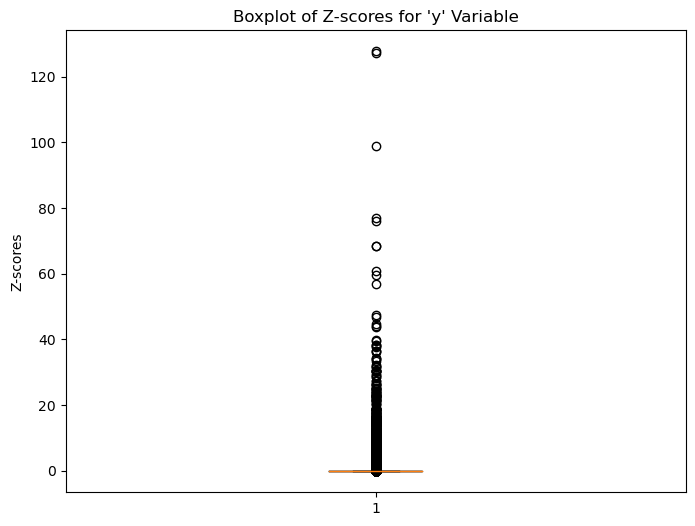

In [ ]:
import matplotlib.pyplot as plt

######### Calculate the Z-scores for the target variable 'y'
z_scores = stats.zscore(y)

####### Create a boxplot to visualize the Z-scores
plt.figure(figsize=(8, 6))
plt.boxplot(z_scores)
plt.title("Boxplot of Z-scores for 'y' Variable")
plt.ylabel("Z-scores")
plt.show()

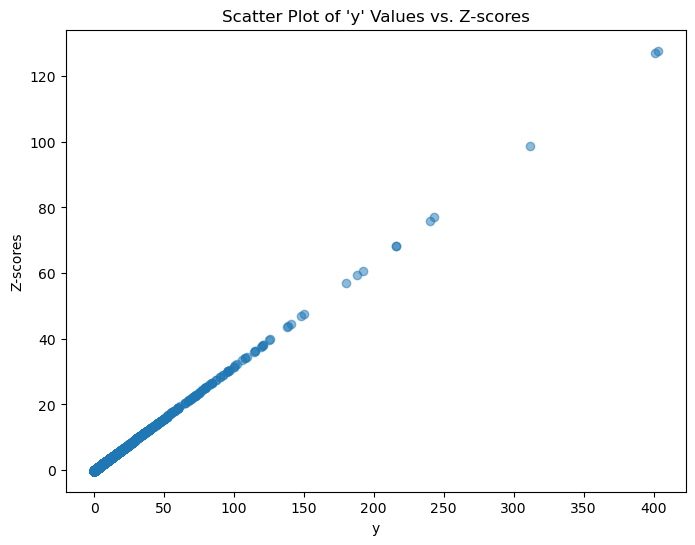

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, z_scores, alpha=0.5)
plt.title("Scatter Plot of 'y' Values vs. Z-scores")
plt.xlabel("y")
plt.ylabel("Z-scores")
plt.show()


In [ ]:
# Remove the outlier rows from X and y
X = X[~outlier_indices]
y = y[~outlier_indices]

In [ ]:
X

,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,item_sales_last_hour,item_sales_last_N_hours,item_avg_sales_last_N_hours,category_sales_last_N_hours,...,std_sales_per_day,week_number,weekly_sales,unique_items_per_invoice,invoice_year,invoice_month,invoice_day,invoice_hour,day_of_week,weekday
0,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.561298,13.476116,0.562419,3.367993,...,0.000000,01,0.0,175,2022,1,5,0,2,1
1,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,01,0.0,175,2022,1,5,1,2,1
2,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,01,0.0,175,2022,1,5,2,2,1
3,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,01,0.0,175,2022,1,5,3,2,1
4,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,01,0.0,175,2022,1,5,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308347,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.204124,11,14.0,175,2022,3,18,19,4,1
308348,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.204124,11,14.0,175,2022,3,18,20,4,1
308349,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.204124,11,14.0,175,2022,3,18,21,4,1
308350,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.204124,11,14.0,175,2022,3,18,22,4,1


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
308347    0.0
308348    0.0
308349    0.0
308350    0.0
308351    0.0
Name: nxt_hr_qty_(Y), Length: 304186, dtype: float64

### constant columns

In [ ]:
# Check for constant columns
constant_columns = X.columns[X.nunique() == 1]

# Print the list of constant columns
print("Constant Columns:")
print(constant_columns)

Constant Columns:
Index(['unique_items_per_invoice', 'invoice_year'], dtype='object')


##### remove constant columns

In [ ]:
X = X.drop(columns=constant_columns)

In [ ]:
########## Get non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['int', 'float']).columns

########## Get numerical columns
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

########## Print the list of non-numeric column names
print("Non-Numeric Columns:")
print(non_numeric_columns)

########## Print the list of numerical column names
print("Numerical Columns:")
print(numeric_columns)

Non-Numeric Columns:
Index(['item_sub_segment', 'item_segment', 'item_category',
       'item_sub_department', 'item_department', 'week_number'],
      dtype='object')
Numerical Columns:
Index(['item_qty', 'item_sales_last_hour', 'item_sales_last_N_hours',
       'item_avg_sales_last_N_hours', 'category_sales_last_N_hours',
       'department_sales_last_N_hours', 'item_sales_last_6_hours',
       '6_hour_moving_average', 'total_sales_per_item',
       'average_sales_per_item', 'std_sales_per_item', 'total_sales_per_hour',
       'avg_sales_per_hour', 'std_sales_per_hour',
       'sales_change_from_previous_hour', 'total_sales_per_hour_dayly',
       'mean_sales_per_hour_dayly', 'total_sales_per_day', 'avg_sales_per_day',
       'median_per_day', 'std_sales_per_day', 'weekly_sales', 'invoice_month',
       'invoice_day', 'invoice_hour', 'day_of_week', 'weekday'],
      dtype='object')


# train test

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
Master_Table.columns

Index(['nxt_hr_qty_(Y)', 'invoice_date', 'invoice_time', 'item_code',
       'item_qty', 'item_sub_segment', 'item_segment', 'item_category',
       'item_sub_department', 'item_department', 'item_sales_last_hour',
       'item_sales_last_N_hours', 'item_avg_sales_last_N_hours',
       'category_sales_last_N_hours', 'department_sales_last_N_hours',
       'item_sales_last_6_hours', '6_hour_moving_average',
       'total_sales_per_item', 'average_sales_per_item', 'std_sales_per_item',
       'total_sales_per_hour', 'avg_sales_per_hour', 'std_sales_per_hour',
       'sales_change_from_previous_hour', 'total_sales_per_hour_dayly',
       'mean_sales_per_hour_dayly', 'total_sales_per_day', 'avg_sales_per_day',
       'median_per_day', 'std_sales_per_day', 'week_number', 'weekly_sales',
       'unique_items_per_invoice', 'invoice_year', 'invoice_month',
       'invoice_day', 'invoice_hour', 'day_of_week', 'weekday'],
      dtype='object')

In [ ]:
numerical_features =['item_qty', 'item_sales_last_hour', 'item_sales_last_N_hours',
       'item_avg_sales_last_N_hours', 'category_sales_last_N_hours',
       'department_sales_last_N_hours', 'item_sales_last_6_hours',
       '6_hour_moving_average', 'total_sales_per_item',
       'average_sales_per_item', 'std_sales_per_item', 'total_sales_per_hour',
       'avg_sales_per_hour', 'std_sales_per_hour',
       'sales_change_from_previous_hour', 'total_sales_per_hour_dayly',
       'mean_sales_per_hour_dayly', 'total_sales_per_day', 'avg_sales_per_day',
       'median_per_day', 'std_sales_per_day', 'weekly_sales', 'invoice_month',
       'invoice_day', 'invoice_hour', 'day_of_week', 'weekday']

In [ ]:
categorical_features = ['item_sub_segment', 'item_segment', 'item_category',
       'item_sub_department', 'item_department', 'week_number']

In [ ]:
# Define the number of best features to select from all features
k_all_features = 20  # Adjust the number of features to select as needed

# Create a SelectKBest feature selector for all features
f_selector_all = SelectKBest(score_func=f_classif, k=k_all_features)

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Create a feature selection pipeline
feature_selection_all_pipeline = Pipeline([
    ('selector', f_selector_all)
])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", numerical_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features),
        ('feature_selection', feature_selection_all_pipeline, numerical_features)
    ],
    remainder='passthrough'

)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: nxt_hr_qty_(Y), dtype: float64

In [ ]:
X

,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department,item_sales_last_hour,item_sales_last_N_hours,item_avg_sales_last_N_hours,category_sales_last_N_hours,...,avg_sales_per_day,median_per_day,std_sales_per_day,week_number,weekly_sales,invoice_month,invoice_day,invoice_hour,day_of_week,weekday
0,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.561298,13.476116,0.562419,3.367993,...,0.000000,0.0,0.000000,01,0.0,1,5,0,2,1
1,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,0.0,0.000000,01,0.0,1,5,1,2,1
2,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,0.0,0.000000,01,0.0,1,5,2,2,1
3,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,0.0,0.000000,01,0.0,1,5,3,2,1
4,0.0,Box,Full Cream Powdered Milk,Powdered Milk,Milk & Creamers,Beverages,0.000000,13.476116,0.562419,3.367993,...,0.000000,0.0,0.000000,01,0.0,1,5,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308347,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.041667,0.0,0.204124,11,14.0,3,18,19,4,1
308348,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.041667,0.0,0.204124,11,14.0,3,18,20,4,1
308349,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.041667,0.0,0.204124,11,14.0,3,18,21,4,1
308350,0.0,Ice Cream Popsicle,Ice Cream Popsicle,Ice Cream Single Consumption,Desserts,Frozen Food,0.000000,1.000000,0.083333,0.000000,...,0.041667,0.0,0.204124,11,14.0,3,18,22,4,1


In [ ]:
for column in X.columns:
    print(column)

item_qty
item_sub_segment
item_segment
item_category
item_sub_department
item_department
item_sales_last_hour
item_sales_last_N_hours
item_avg_sales_last_N_hours
category_sales_last_N_hours
department_sales_last_N_hours
item_sales_last_6_hours
6_hour_moving_average
total_sales_per_item
average_sales_per_item
std_sales_per_item
total_sales_per_hour
avg_sales_per_hour
std_sales_per_hour
sales_change_from_previous_hour
total_sales_per_hour_dayly
mean_sales_per_hour_dayly
total_sales_per_day
avg_sales_per_day
median_per_day
std_sales_per_day
week_number
weekly_sales
invoice_month
invoice_day
invoice_hour
day_of_week
weekday


In [ ]:
len(X)

304186

In [ ]:
len(y)

304186

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_jobs=-1)

pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("regressor", regressor)
])

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['item_qty',
                                                   'item_sales_last_hour',
                                                   'item_sales_last_N_hours',
                                                   'item_avg_sales_last_N_hours',
                                                   'category_sales_last_N_hours',
                                                   'department_sales_last_N_hours',
                                                   'item_sales_last_6_hou...
                                                   'total_sales_per_hour',
                                                   'avg_sales_per_hour',
                                                   'std_sales_per_hour',
                                                   'sales_change_from_previous_hour',
                                                   'total_sales_per_hour_dayly',
                                                   'mean_sales_per_hour_dayly',
                                                   'total_sales_per_day',
                                                   'avg_sales_per_day',
                                                   'median_per_day',
                                                   'std_sales_per_day',
                                                   'weekly_sales',
                                                   'invoice_month',
                                                   'invoice_day',
                                                   'invoice_hour',
                                                   'day_of_week',
                                                   'weekday'])])),
                ('regressor', RandomForestRegressor(n_jobs=-1))])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['item_qty',
                                                   'item_sales_last_hour',
                                                   'item_sales_last_N_hours',
                                                   'item_avg_sales_last_N_hours',
                                                   'category_sales_last_N_hours',
                                                   'department_sales_last_N_hours',
                                                   'item_sales_last_6_hou...
                                                   'total_sales_per_hour',
                                                   'avg_sales_per_hour',
                                                   'std_sales_per_hour',
                                                   'sales_change_from_previous_hour',
                                                   'total_sales_per_hour_dayly',
                                                   'mean_sales_per_hour_dayly',
                                                   'total_sales_per_day',
                                                   'avg_sales_per_day',
                                                   'median_per_day',
                                                   'std_sales_per_day',
                                                   'weekly_sales',
                                                   'invoice_month',
                                                   'invoice_day',
                                                   'invoice_hour',
                                                   'day_of_week',
                                                   'weekday'])])),
                ('regressor', RandomForestRegressor(n_jobs=-1))])

In [ ]:
pipeline.predict(X_train)

array([0.     , 0.     , 4.23688, ..., 0.     , 0.02   , 0.     ])

# Hyperparameter tuning

In [ ]:
param_grid = {
               'regressor__n_estimators': [100],             # Default value 'regressor__n_estimators': [50, 100, 150],
               'regressor__max_depth': [None],               # Default value  'regressor__max_depth': [None, 10, 20, 30],
               'regressor__min_samples_split': [2],          # Default value  'regressor__min_samples_split': [2, 5, 10],
               'regressor__min_samples_leaf': [1],           # Default value  'regressor__min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the training and testing datasets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate the evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE) - Training: ", mse_train)
print("Mean Squared Error (MSE) - Testing: ", mse_test)
print("Root Mean Squared Error (RMSE) - Training: ", rmse_train)
print("Root Mean Squared Error (RMSE) - Testing: ", rmse_test)
print("Mean Absolute Error (MAE) - Training: ", mae_train)
print("Mean Absolute Error (MAE) - Testing: ", mae_test)
print("R-squared (R2) - Training: ", r2_train)
print("R-squared (R2) - Testing: ", r2_test)

Mean Squared Error (MSE) - Training:  0.02130744005119288
Mean Squared Error (MSE) - Testing:  0.16219951847304945
Root Mean Squared Error (RMSE) - Training:  0.14597068216321002
Root Mean Squared Error (RMSE) - Testing:  0.4027400134988445
Mean Absolute Error (MAE) - Training:  0.035799501197576675
Mean Absolute Error (MAE) - Testing:  0.09949231239589726
R-squared (R2) - Training:  0.979781847057209
R-squared (R2) - Testing:  0.8461363818706927


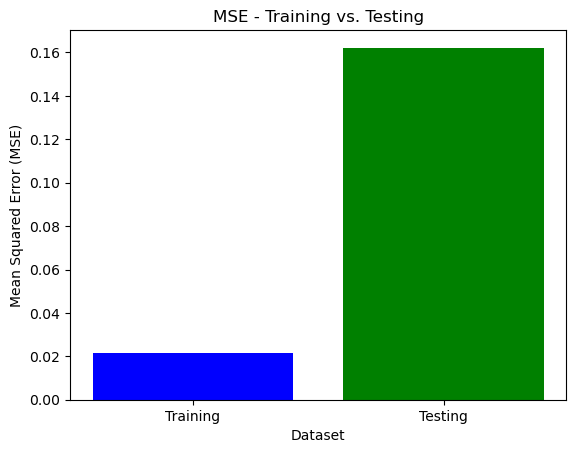

In [ ]:
import matplotlib.pyplot as plt

# Data
mse_values = [mse_train, mse_test]
labels = ['Training', 'Testing']

# Create bar plot
plt.bar(labels, mse_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE - Training vs. Testing')
plt.show()

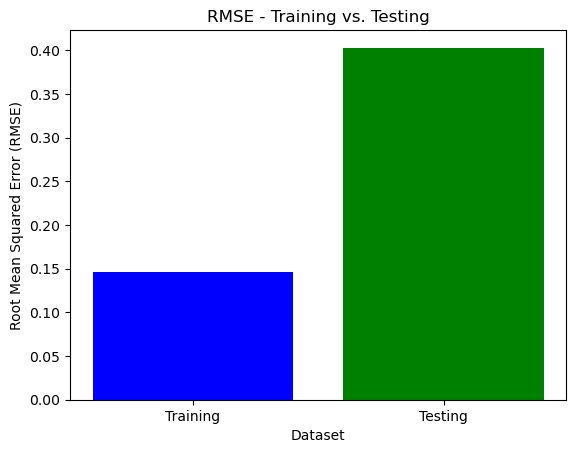

In [ ]:
import matplotlib.pyplot as plt

# Data
rmse_values = [rmse_train, rmse_test]
labels = ['Training', 'Testing']

# Create bar plot
plt.bar(labels, rmse_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE - Training vs. Testing')
plt.show()

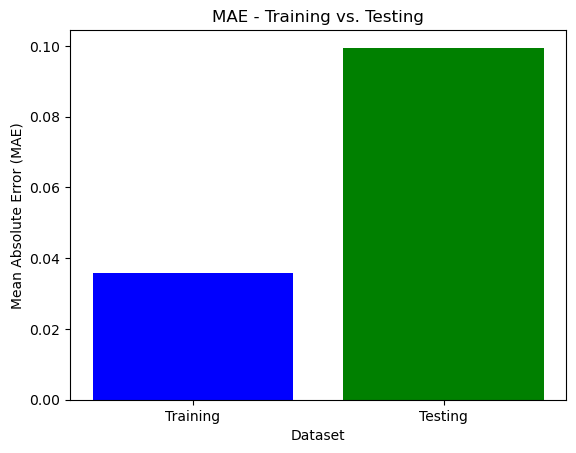

In [ ]:
import matplotlib.pyplot as plt

# Data
mae_values = [mae_train, mae_test]
labels = ['Training', 'Testing']

# Create bar plot
plt.bar(labels, mae_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE - Training vs. Testing')
plt.show()

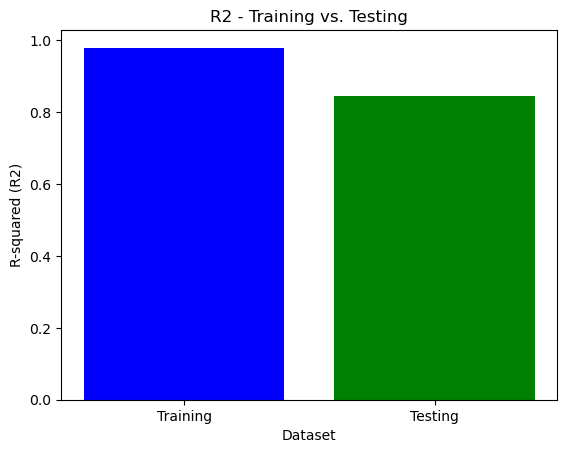

In [ ]:
import matplotlib.pyplot as plt

# Data
r2_values = [r2_train, r2_test]
labels = ['Training', 'Testing']

# Create bar plot
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('R-squared (R2)')
plt.title('R2 - Training vs. Testing')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Using the pipeline with your trained model
scores = cross_val_score(pipeline, X, y, cv=5, n_jobs=-1)  # Use all available CPU cores
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

KeyboardInterrupt: 

Cross-Validation Scores: [0.77969221 0.85452143]
Mean Score: 0.8171068197027103


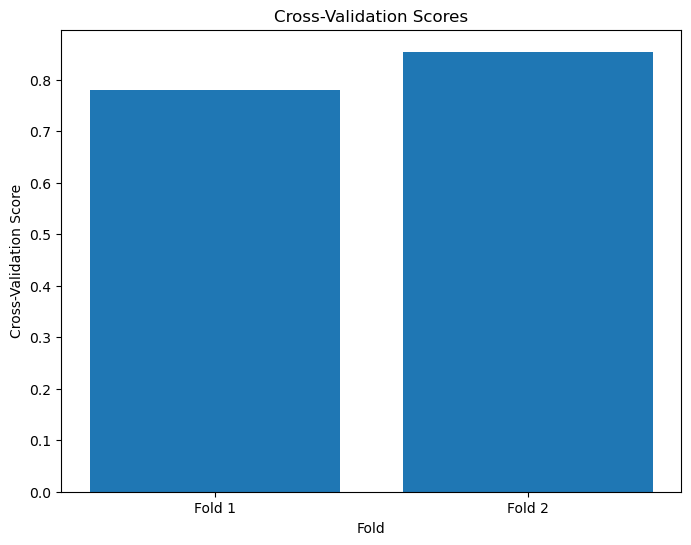

In [ ]:
# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, n_jobs=-1)  # Use the appropriate number of folds (e.g., cv=5)

# Print the cross-validation scores and mean score
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

# Create a bar plot to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores)
plt.xlabel("Fold")
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Scores")
plt.xticks(range(len(scores)), labels=[f"Fold {i + 1}" for i in range(len(scores))])
plt.show()

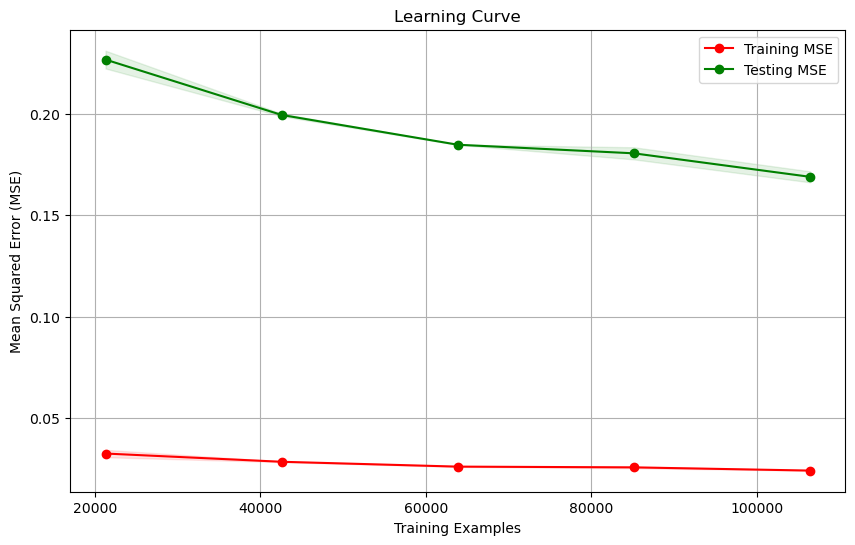

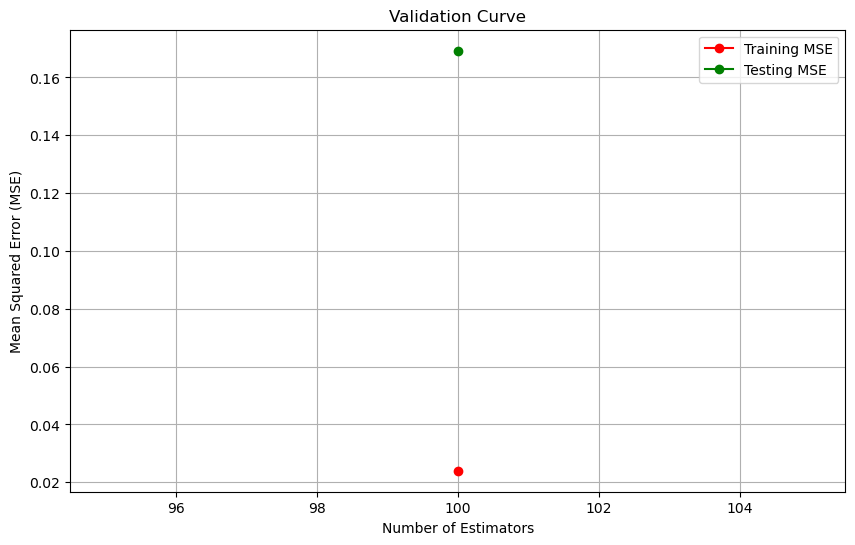

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=[0.2, 0.4, 0.6, 0.8, 1.0])

# Calculate the mean and standard deviation of training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing MSE")
plt.legend(loc="best")
plt.show()

# Validation Curve
param_range = [100]  # Adjust as needed
train_scores, test_scores = validation_curve(pipeline, X_train, y_train, param_name="regressor__n_estimators", param_range=param_range, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate the mean of training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training MSE")
plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Testing MSE")
plt.legend(loc="best")
plt.show()

###########MSE (Mean Squared Error) is a measure of the average squared difference between actual and predicted values. In your case, the MSE on the testing data is higher than on the training data, which is expected. A higher MSE on the testing data is common but can still indicate good model performance as long as it's not excessively higher.



###########RMSE (Root Mean Squared Error) is the square root of MSE. Similar to MSE, a lower RMSE indicates better model performance. In your case, the RMSE on the testing data is higher than on the training data, which is typical.



#########MAE (Mean Absolute Error) measures the average absolute difference between actual and predicted values. Like MSE and RMSE, a lower MAE is better. Again, the MAE on the testing data is higher, which is typical.



#########R-squared (R2) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 value of 1 indicates a perfect fit, and an R2 value of 0 means the model doesn't explain the variance at all. In your case, the R2 value is relatively high (0.8515), which is a good sign.



##########Based on these metrics, your model seems to be performing well on both training and testing data. There is a difference between training and testing metrics, but it's not extreme, and the R2 value is reasonable. This suggests that the model is generalizing effectively to unseen data, which is a sign of good model performance, and it is not overfitting.



##########However, it's also important to consider the specific context and the problem you are solving. You should analyze your data, business requirements, and the goals of your modeling to ensure that the model's performance aligns with your objectives.




